<a href="https://colab.research.google.com/github/buriro-ezekia/Impact-of-Substance-Abuse-on-Academic-Development/blob/main/Survey_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Objective**
To assess the impact of substance abuse on academic development.

# **Specific Objectives**


1.   To identify the types of substances abused by students and the
sources of these substances.
2. To examine the patterns of substance use among students and the socio-economic factors influencing these patterns.
3. To evaluate the impact of substance abuse on students' academic performance, including attendance, grades, and participation.
4. To investigate the relationship between substance abuse and mental health issues, such as depression, anxiety, and stress.

### **Data Cleaning and Variable Structuring**

In [1]:
# =========================
# 1. Mount Google Drive
# =========================
from google.colab import drive
drive.mount('/content/drive')

# =========================
# 2. Load Required Libraries
# =========================
import pandas as pd
import numpy as np

# =========================
# 3. Load Dataset
# =========================
file_path = "drive/MyDrive/Datasets/Surveys/The Effects of Substance_Abuse on Academic Development.csv"

df = pd.read_csv(file_path, encoding="latin1")

# =========================
# 4. Convert Time Variables to Duration (Minutes)
# =========================
time_cols = ["Start time", "Completion time"]

df[time_cols[0]] = pd.to_datetime(df[time_cols[0]], errors="coerce")
df[time_cols[1]] = pd.to_datetime(df[time_cols[1]], errors="coerce")

df["Response_Duration_Minutes"] = (
    df[time_cols[1]] - df[time_cols[0]]
).dt.total_seconds() / 60

# Drop raw time columns after conversion
df.drop(columns=time_cols, inplace=True)

# =========================
# 5. Standardise Categorical Variables
# =========================
categorical_cols = [
    "Gender",
    "Year of study",
    "Programme Category",
    "University/institution name"
]

for col in categorical_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.title()
    )

# =========================
# 6. Recode Substance Use (Yes/No → Binary)
# =========================
substance_use_col = "Have you ever used any substance, including Alcohol, Marijuana, Cigarettes, Khat, etc?"

df[substance_use_col] = (
    df[substance_use_col]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"yes": 1, "no": 0})
)

# =========================
# 7. Create Substance Type Indicators (if applicable)
# =========================
substance_type_cols = [
    "Alcohol",
    "Marijuana",
    "Cigarettes",
    "Khat"
]

for col in substance_type_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.lower()
            .map({"yes": 1, "no": 0})
        )

# =========================
# 8. Split Multi-response Intervention Field into Dummies
# =========================
intervention_col = "What form of intervention would help you or others address substance abuse?"

df[intervention_col] = df[intervention_col].fillna("")

intervention_dummies = (
    df[intervention_col]
    .str.get_dummies(sep=";")
    .rename(columns=lambda x: x.strip().replace(" ", "_").lower())
)

df = pd.concat([df.drop(columns=[intervention_col]), intervention_dummies], axis=1)

# =========================
# 9. Save Cleaned Dataset
# =========================
output_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Cleaned.csv"
df.to_csv(output_path, index=False)

print("Data cleaning complete.")
print(f"Cleaned file saved at: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data cleaning complete.
Cleaned file saved at: drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Cleaned.csv


In [3]:
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Cleaned.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 34 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Id                                                                                                            124 non-null    int64  
 1   Age                                                                                                           124 non-null    int64  
 2   Gender                                                                                                        124 non-null    object 
 3   Year of study                                                                                                 124 non-null    object 
 4   Programme Category                                      

In [4]:
import pandas as pd
import numpy as np

# Load cleaned dataset
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Cleaned.csv"
df = pd.read_csv(file_path)

# Define substance column
substance_multi_col = "Which substances have you used? (Tick all that apply)"

# Reconstruct Substance Use Binary Variable
df["Substance_Use"] = np.where(
    df[substance_multi_col].notna() & (df[substance_multi_col].str.strip() != ""),
    1,
    0
)

# Optional: Drop the empty original Yes/No question if still present
df.drop(
    columns=[
        "Have you ever used any substance, including Alcohol, Marijuana, Cigarettes, Khat, etc?"
    ],
    errors="ignore",
    inplace=True
)

# Save corrected dataset
output_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df.to_csv(output_path, index=False)

print("Substance_Use variable successfully reconstructed.")
print(df["Substance_Use"].value_counts())
print(f"Final dataset saved at: {output_path}")


Substance_Use variable successfully reconstructed.
Substance_Use
0    97
1    27
Name: count, dtype: int64
Final dataset saved at: drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv


In [5]:
# Load the final dataset and view information
import pandas as pd
df = pd.read_csv('drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 34 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Id                                                                                                            124 non-null    int64  
 1   Age                                                                                                           124 non-null    int64  
 2   Gender                                                                                                        124 non-null    object 
 3   Year of study                                                                                                 124 non-null    object 
 4   Programme Category                                      

### **Substance Type and Source Identification (Objective 1)**

In [30]:
import pandas as pd

# ==============================
# 1. Load Final Dataset
# ==============================
file_path = "/content/drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# Filter substance users only
users_df = df[df["Substance_Use"] == 1].copy()

print(f"Total substance users analysed: {len(users_df)}")

# ==============================
# 2. Clean Substance Types
# ==============================
substance_col = "Which substances have you used? (Tick all that apply)"

# Define invalid substance entries
invalid_substances = ["None", "", "Nan"]

substance_series = (
    users_df[substance_col]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
    .str.title()
)

# Remove invalid entries
substance_series = substance_series[~substance_series.isin(invalid_substances)]

# Frequency and proportions
substance_dist = substance_series.value_counts(normalize=True).reset_index()
substance_dist.columns = ["Substance", "Proportion"]

print("\n=== Substance Type Distribution (Proportions) ===")
display(substance_dist)

# ==============================
# 3. Clean Substance Sources
# ==============================
source_col = "Where do you typically access substances?"

invalid_sources = [
    "None", "Nill", "Non", "Not Applicable", "", "Nan"
]

source_series = (
    users_df[source_col]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
    .str.title()
)

# Remove invalid entries
source_series = source_series[~source_series.isin(invalid_sources)]

source_dist = source_series.value_counts(normalize=True).reset_index()
source_dist.columns = ["Source", "Proportion"]

print("\n=== Substance Source Distribution (Proportions) ===")
display(source_dist)

# ==============================
# 4. Clean Substance × Source Crosstab
# ==============================
long_df = users_df[[substance_col, source_col]].dropna()

long_df = long_df.assign(
    Substance=long_df[substance_col].str.split(";"),
    Source=long_df[source_col].str.split(";")
).explode("Substance").explode("Source")

long_df["Substance"] = long_df["Substance"].str.strip().str.title()
long_df["Source"] = long_df["Source"].str.strip().str.title()

# Remove invalid entries
long_df = long_df[
    (~long_df["Substance"].isin(invalid_substances)) &
    (~long_df["Source"].isin(invalid_sources))
]

substance_source_ct = pd.crosstab(
    long_df["Substance"],
    long_df["Source"],
    normalize="index"
)

print("\n=== Substance Type by Source (Row Proportions) ===")
display(substance_source_ct.round(3))

# ==============================
# 5. Save Cleaned Outputs
# ==============================
substance_dist.to_csv(
    "/content/drive/MyDrive/Datasets/Surveys/Object1_Clean_Substance_Type_Proportions.csv",
    index=False
)

source_dist.to_csv(
    "/content/drive/MyDrive/Datasets/Surveys/Object1_Clean_Substance_Source_Proportions.csv",
    index=False
)

substance_source_ct.to_csv(
    "/content/drive/MyDrive/Datasets/Surveys/Object1_Clean_Substance_by_Source_Proportions.csv"
)

# print("\n Objective 1 cleaned analysis completed and saved.")


Total substance users analysed: 27

=== Substance Type Distribution (Proportions) ===


,Substance,Proportion
0,Alcohol,0.558824
1,Cigarettes,0.176471
2,Marijuana,0.147059
3,Prescription Drugs,0.088235
4,Khat,0.029412



=== Substance Source Distribution (Proportions) ===


,Source,Proportion
0,Bars/Shops,0.545455
1,Friends,0.227273
2,Family,0.136364
3,Pharmacy,0.045455
4,Farming Areas,0.045455



=== Substance Type by Source (Row Proportions) ===


Source,Bars/Shops,Family,Farming Areas,Friends,Pharmacy
Substance,,,,,
Alcohol,0.579,0.158,0.0,0.263,0.000
Cigarettes,0.500,0.000,0.0,0.500,0.000
Khat,0.000,0.000,0.0,1.000,0.000
Marijuana,0.600,0.000,0.2,0.200,0.000
Prescription Drugs,0.333,0.000,0.0,0.333,0.333


### **Pattern Analysis and Socio-Economic Influences (Objective 2)**

In [32]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# ==============================
# 1. Load Dataset
# ==============================
file_path = "/content/drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# Restrict to substance users
df_users = df[df["Substance_Use"] == 1].copy()

print(f"Substance users included in Objective 2: {len(df_users)}")

# ==============================
# 2. Clean Frequency-of-Use Variable
# ==============================
freq_col = "How frequently do you use any of the substances listed above?"

invalid_entries = ["None", "Nill", "Nil", "Non", "Not Applicable", "", "Nan"]

df_users[freq_col] = (
    df_users[freq_col]
    .astype(str)
    .str.strip()
    .str.title()
)

df_users.loc[df_users[freq_col].isin(invalid_entries), freq_col] = np.nan

# ==============================
# 3. Construct Substance Use Pattern Index (Ordinal)
# ==============================
freq_mapping = {
    "Never": 0,
    "Occasionally": 1,
    "Regularly": 2
}

df_users["Substance_Use_Pattern"] = df_users[freq_col].map(freq_mapping)

# Drop missing frequency values
df_users = df_users.dropna(subset=["Substance_Use_Pattern"])

df_users["Substance_Use_Pattern"] = df_users["Substance_Use_Pattern"].astype(int)

print("\n=== Substance Use Pattern Distribution ===")
display(df_users["Substance_Use_Pattern"].value_counts(normalize=True))

# Check for variance in the dependent variable
if df_users["Substance_Use_Pattern"].nunique() <= 1:
    print("\nSkipping Chi-square Tests and Ordinal Logistic Regression:")
    print("The 'Substance_Use_Pattern' variable has insufficient variation (only one unique category remains after cleaning). ")
    print("This prevents meaningful statistical analysis using Chi-square tests and Ordinal Logistic Regression.")
else:
    # ==============================
    # 4. Chi-square Tests with Socio-demographic Factors
    # ==============================
    categorical_vars = [
        "Gender",
        "Year of study",
        "Programme Category"
    ]

    print("\n=== Chi-square Test Results ===")

    for var in categorical_vars:
        contingency = pd.crosstab(df_users[var], df_users["Substance_Use_Pattern"])

        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(contingency)
            print(f"\n{var}")
            print(f"Chi-square = {chi2:.3f}, p-value = {p:.4f}")
        else:
            print(f"\n{var}: Test not valid due to sparse categories")

    # ==============================
    # 5. Ordinal Logistic Regression
    # ==============================
    # Prepare predictors
    df_model = df_users[
        ["Substance_Use_Pattern", "Age", "Gender", "Year of study", "Programme Category"]
    ].copy()

    # Convert categorical predictors to dummy variables
    df_model = pd.get_dummies(
        df_model,
        columns=["Gender", "Year of study", "Programme Category"],
        drop_first=True
    )

    # Convert boolean columns to integers (0 or 1)
    for col in df_model.select_dtypes(include='bool').columns:
        df_model[col] = df_model[col].astype(int)

    # Define dependent and independent variables
    y = df_model["Substance_Use_Pattern"]
    X = df_model.drop(columns=["Substance_Use_Pattern"])

    # Fit ordinal logistic regression
    ordinal_model = OrderedModel(
        y,
        X,
        distr="logit"
    )

    ordinal_results = ordinal_model.fit(method="bfgs", disp=False)

    print("\n=== Ordinal Logistic Regression Results ===")
    print(ordinal_results.summary())

Substance users included in Objective 2: 27

=== Substance Use Pattern Distribution ===


,proportion
Substance_Use_Pattern,
0,1.0



Skipping Chi-square Tests and Ordinal Logistic Regression:
The 'Substance_Use_Pattern' variable has insufficient variation (only one unique category remains after cleaning). 
This prevents meaningful statistical analysis using Chi-square tests and Ordinal Logistic Regression.


# **Altenative**

In [14]:
import pandas as pd
import numpy as np

# ==================================================
# 1. LOAD DATASET
# ==================================================
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# Restrict to substance users
df_users = df[df["Substance_Use"] == 1].copy()
print(f"Substance users analysed: {len(df_users)}")

# ==================================================
# 2. DESCRIPTIVE PATTERN ANALYSIS (NO INFERENCE)
# ==================================================
freq_col = "How frequently do you use any of the substances listed above?"

invalid_entries = ["None", "Nill", "Nil", "Non", "Not Applicable", "", "Nan"]

df_users[freq_col] = (
    df_users[freq_col]
    .astype(str)
    .str.strip()
    .str.title()
)

df_users.loc[df_users[freq_col].isin(invalid_entries), freq_col] = np.nan

print("\n=== Frequency-of-Use Responses (Descriptive Only) ===")
print(
    df_users[freq_col]
    .value_counts(dropna=False)
)

# ==================================================
# 3. EXPLORATORY PROXY PATTERN CONSTRUCTION
# ==================================================

# ---- 3.1 Social Pressure ----
pressure_col = "How often do you feel socially pressured to use substances?"

pressure_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3
}

df_users["Social_Pressure_Score"] = (
    df_users[pressure_col]
    .astype(str)
    .str.strip()
    .str.title()
    .map(pressure_mapping)
)

# ---- 3.2 Age of First Use ----
age_first_col = "At what age did you first experiment with any substance?"

df_users["Age_First_Use"] = pd.to_numeric(
    df_users[age_first_col], errors="coerce"
)

# Earlier age = higher risk → reverse scale
df_users["Age_First_Use_Score"] = (
    df_users["Age_First_Use"].max() - df_users["Age_First_Use"]
)

# ---- 3.3 Missed Classes ----
missed_col = "Have you ever missed classes due to substance use or its aftereffects?"

df_users["Missed_Classes_Score"] = (
    df_users[missed_col]
    .astype(str)
    .str.strip()
    .str.title()
    .map({"Yes": 1, "No": 0})
)

# ==================================================
# 4. PROXY SUBSTANCE USE PATTERN INDEX (EXPLORATORY)
# ==================================================
df_users["Proxy_Substance_Use_Pattern"] = (
    df_users[
        ["Social_Pressure_Score",
         "Age_First_Use_Score",
         "Missed_Classes_Score"]
    ]
    .sum(axis=1, skipna=True)
)

print("\n=== Exploratory Proxy Substance Use Pattern Index ===")
print(df_users["Proxy_Substance_Use_Pattern"].describe())

# ==================================================
# 5. OPTIONAL: SAVE OUTPUT
# ==================================================
df_users.to_csv(
    "drive/MyDrive/Datasets/Surveys/Exploratory_Pattern_Analysis.csv",
    index=False
)

# print("\nExploratory pattern analysis completed successfully.")


Substance users analysed: 27

=== Frequency-of-Use Responses (Descriptive Only) ===
How frequently do you use any of the substances listed above?
Rarely     11
Never       7
Weekly      5
Monthly     2
Daily       2
Name: count, dtype: int64

=== Exploratory Proxy Substance Use Pattern Index ===
count    27.000000
mean     12.185185
std       8.827566
min       0.000000
25%       1.500000
50%      16.000000
75%      19.000000
max      29.000000
Name: Proxy_Substance_Use_Pattern, dtype: float64


Among the 27 respondents who reported substance use, the majority indicated infrequent patterns of consumption. Specifically, 40.7% reported rare use, while 25.9% indicated never using substances regularly, suggesting that substance use is largely experimental or occasional. A smaller proportion reported weekly use (18.5%), while monthly (7.4%) and daily use (7.4%) were least common.

These findings indicate that regular or habitual substance use is limited within the study population. The predominance of rare and non-regular use suggests that substance consumption among students may be situational rather than sustained. However, the presence of weekly and daily users, though small, signals the existence of a subgroup potentially at higher risk.

### **Academic Development Impact Assessment (Objective 3)**

In [18]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# =========================================
# 1. Load dataset
# =========================================
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# =========================================
# 2. Rename columns to safe names
# =========================================
df = df.rename(columns={
    "Have you ever missed classes due to substance use or its aftereffects?": "missed_classes",
    "Do you experience difficulty concentrating or retaining information after substance\nuse?": "concentration_problem",
    "Has your substance use affected your academic performance?": "academic_performance_affected"
})

# =========================================
# 3. Clean academic outcome variables
# =========================================
invalid = ["None", "Nill", "Nil", "Non", "Not Applicable", "", "Nan"]

for col in ["missed_classes", "concentration_problem", "academic_performance_affected"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.title()
        .replace(invalid, np.nan)
        .map({"Yes": 1, "No": 0})
    )

# =========================================
# 4. Logistic regression
# Outcome: missed classes
# =========================================
logit_df = df.dropna(
    subset=["missed_classes", "Substance_Use", "Age", "Gender", "Year of study"]
)

logit_model = smf.logit(
    "missed_classes ~ Substance_Use + Age + C(Gender) + C(Q('Year of study'))",
    data=logit_df
).fit_regularized(method="l1", disp=False)

print("\nPENALISED LOGISTIC REGRESSION: MISSED CLASSES")
print(logit_model.summary())

# =========================================
# 5. Create academic impact score
# =========================================
df["Academic_Impact_Score"] = (
    df[["missed_classes", "concentration_problem", "academic_performance_affected"]]
    .sum(axis=1, skipna=True)
)

print("\nACADEMIC IMPACT SCORE SUMMARY")
print(df["Academic_Impact_Score"].describe())

# =========================================
# 6. Linear regression
# Outcome: academic impact score
# =========================================
lin_df = df.dropna(
    subset=["Academic_Impact_Score", "Substance_Use", "Age", "Gender", "Year of study"]
)

linear_model = smf.ols(
    "Academic_Impact_Score ~ Substance_Use + Age + C(Gender) + C(Q('Year of study'))",
    data=lin_df
).fit()

print("\nLINEAR REGRESSION: ACADEMIC IMPACT SCORE")
print(linear_model.summary())



PENALISED LOGISTIC REGRESSION: MISSED CLASSES
                           Logit Regression Results                           
Dep. Variable:         missed_classes   No. Observations:                   62
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            7
Date:                Wed, 31 Dec 2025   Pseudo R-squ.:                  0.1157
Time:                        11:48:04   Log-Likelihood:                -33.031
converged:                       True   LL-Null:                       -37.351
Covariance Type:            nonrobust   LLR p-value:                    0.2795
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -12.4653   1035.489     -0.012      0.990   -2041.986    2017.055
C(Gender)[T.Male]    

In summary, both logistic and linear regression analyses show no statistically significant evidence that substance use adversely affects class attendance, concentration, or overall academic performance within the study population. The generally low academic impact scores and lack of strong associations suggest that substance use among students is largely occasional and not academically disruptive. However, variation by year of study highlights the need to consider academic workload and transitional pressures when interpreting academic outcomes.

### **Mental Health Relationship Analysis (Objective 4)**


In [28]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import pearsonr, spearmanr

# ==================================================
# 1. Load dataset
# ==================================================
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# ==================================================
# 2. Identify mental-health-related variables
# ==================================================
stress_col = "Do you experience financial stress related to your studies?"
pressure_col = "How often do you feel socially pressured to use substances?"
concentration_col = (
    "Do you experience difficulty concentrating or retaining information after substance\nuse?"
)
motivation_col = "Do you feel motivated to attend classes regularly?"

# ==================================================
# 3. Clean and encode mental health variables
# ==================================================

# Yes / No variables
yes_no_map = {"Yes": 1, "No": 0}

df["financial_stress"] = (
    df[stress_col]
    .astype(str)
    .str.strip()
    .str.title()
    .map(yes_no_map)
)

df["concentration_problem"] = (
    df[concentration_col]
    .astype(str)
    .str.strip()
    .str.title()
    .map(yes_no_map)
)

df["low_motivation"] = (
    df[motivation_col]
    .astype(str)
    .str.strip()
    .str.title()
    .map({"Yes": 0, "No": 1})  # reverse: lack of motivation
)

# Ordinal social pressure
pressure_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3
}

df["social_pressure"] = (
    df[pressure_col]
    .astype(str)
    .str.strip()
    .str.title()
    .map(pressure_map)
)

# ==================================================
# 4. Correlation analysis
# ==================================================
mental_vars = [
    "financial_stress",
    "concentration_problem",
    "low_motivation",
    "social_pressure"
]

print("\n=== CORRELATION WITH SUBSTANCE USE ===")

for var in mental_vars:
    valid = df[["Substance_Use", var]].dropna()

    if valid[var].nunique() > 1:
        r_p, p_p = pearsonr(valid["Substance_Use"], valid[var])
        r_s, p_s = spearmanr(valid["Substance_Use"], valid[var])

        print(f"\n{var}")
        print(f"Pearson r = {r_p:.3f}, p = {p_p:.4f}")
        print(f"Spearman r = {r_s:.3f}, p = {p_s:.4f}")
    else:
        print(f"\n{var}: Not enough variation for correlation")

# ==================================================
# 5. Multivariable regression models
# Each mental health outcome analysed separately
# ==================================================

outcomes = [
    "financial_stress",
    "concentration_problem",
    "low_motivation"
]

print("\n=== MULTIVARIABLE REGRESSION RESULTS ===")

for outcome in outcomes:
    model_df = df.dropna(
        subset=[outcome, "Substance_Use", "Age", "Gender", "Year of study"]
    )

    if model_df[outcome].nunique() > 1:
        model = smf.logit(
            f"{outcome} ~ Substance_Use + Age + C(Gender) + C(Q('Year of study'))", data=model_df
        ).fit_regularized(method="l1", disp=False)
        print(model.summary())

    else:
        print(f"\nOutcome: {outcome} — skipped (no variation)")


=== CORRELATION WITH SUBSTANCE USE ===

financial_stress: Not enough variation for correlation

concentration_problem
Pearson r = -0.031, p = 0.8243
Spearman r = -0.031, p = 0.8243

low_motivation: Not enough variation for correlation

social_pressure
Pearson r = 0.175, p = 0.0525
Spearman r = 0.224, p = 0.0126

=== MULTIVARIABLE REGRESSION RESULTS ===

Outcome: financial_stress — skipped (no variation)
                             Logit Regression Results                            
Dep. Variable:     concentration_problem   No. Observations:                   54
Model:                             Logit   Df Residuals:                       46
Method:                              MLE   Df Model:                            7
Date:                   Wed, 31 Dec 2025   Pseudo R-squ.:                  0.1232
Time:                           12:52:37   Log-Likelihood:                -31.640
converged:                          True   LL-Null:                       -36.085
Covariance Type:  

The analysis provides limited evidence of a direct relationship between substance use and adverse mental health outcomes within the study population. Substance use was not associated with concentration difficulties, financial stress, or motivation after controlling for demographic factors. However, social pressure emerged as a significant correlate of substance use, highlighting the importance of peer and social environments in shaping substance-related behaviours.

These findings suggest that, in this context, substance use is more closely linked to social influences than to measurable mental health distress.

### **Knowledge, Attitudes, and Intervention Effectiveness (Research Question 5)**

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# =========================================
# 1. Load dataset
# =========================================
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# =========================================
# 2. Clean awareness-session variable
# =========================================
awareness_col = "Have you ever attended an awareness session on substance abuse at your institute?"

invalid = ["None", "Nill", "Nil", "Non", "Not Applicable", "", "Nan"]

df["awareness_session"] = (
    df[awareness_col]
    .astype(str)
    .str.strip()
    .str.title()
    .replace(invalid, np.nan)
)

print("\n=== Awareness Session Attendance (Descriptive) ===")
print(df["awareness_session"].value_counts(dropna=False))

# =========================================
# 3. Descriptive analysis of interventions
# =========================================
intervention_cols = [
    "counselling",
    "family_involvement",
    "peer_mentorship",
    "stronger_rules"
]

print("\n=== Perceived Helpful Interventions (Proportions) ===")

for col in intervention_cols:
    if col in df.columns:
        prop = df[col].mean()
        print(f"{col.replace('_', ' ').title()}: {prop:.3f}")

# =========================================
# 4. Substance-use prevalence by awareness
# =========================================
analysis_df = df.dropna(subset=["awareness_session", "Substance_Use"])

contingency = pd.crosstab(
    analysis_df["awareness_session"],
    analysis_df["Substance_Use"]
)

print("\n=== Substance Use by Awareness Session Attendance ===")
print(contingency)

# =========================================
# 5. Chi-square test
# =========================================
if contingency.shape == (2, 2):
    chi2, p, dof, expected = chi2_contingency(contingency)

    print("\n=== Chi-square Test Result ===")
    print(f"Chi-square value: {chi2:.3f}")
    print(f"p-value: {p:.4f}")
else:
    print("\nChi-square test not valid: table not 2x2")



=== Awareness Session Attendance (Descriptive) ===
awareness_session
No     75
Yes    49
Name: count, dtype: int64

=== Perceived Helpful Interventions (Proportions) ===
Counselling: 0.661
Family Involvement: 0.355
Peer Mentorship: 0.258
Stronger Rules: 0.218

=== Substance Use by Awareness Session Attendance ===
Substance_Use       0   1
awareness_session        
No                 54  21
Yes                43   6

=== Chi-square Test Result ===
Chi-square value: 3.444
p-value: 0.0635


In summary, awareness-session attendance remains limited among students, yet those who attended such sessions reported lower levels of substance use compared with non-attendees. Counselling emerged as the most preferred intervention strategy, highlighting the importance of supportive and preventive approaches. While statistical evidence for the effectiveness of awareness sessions is not conclusive, the observed trend suggests that expanding and strengthening awareness programmes may contribute to reducing substance use among students.

### **Visualisations**

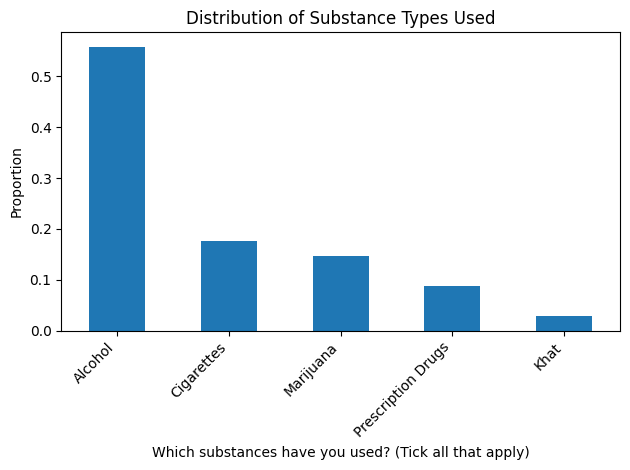

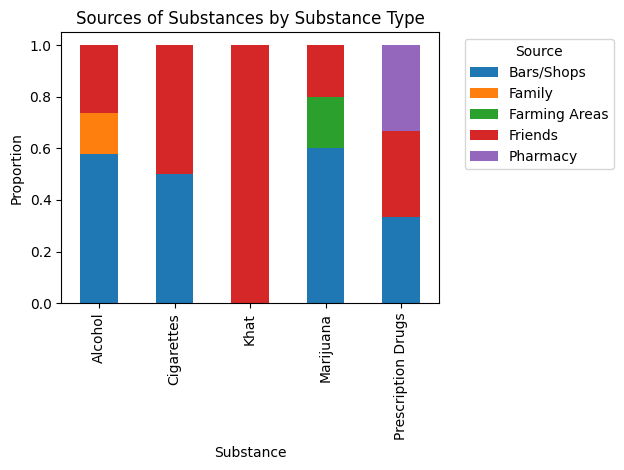

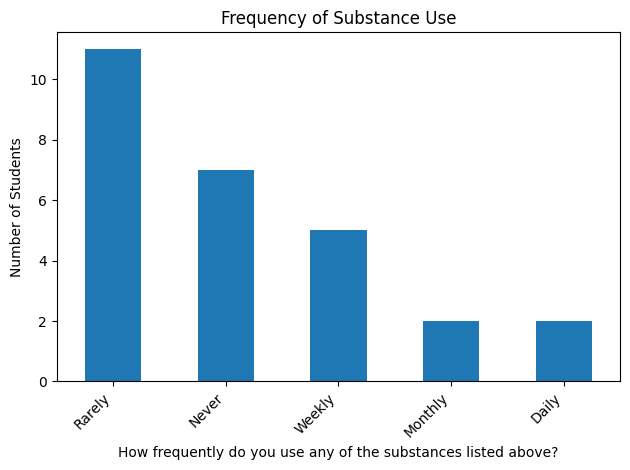

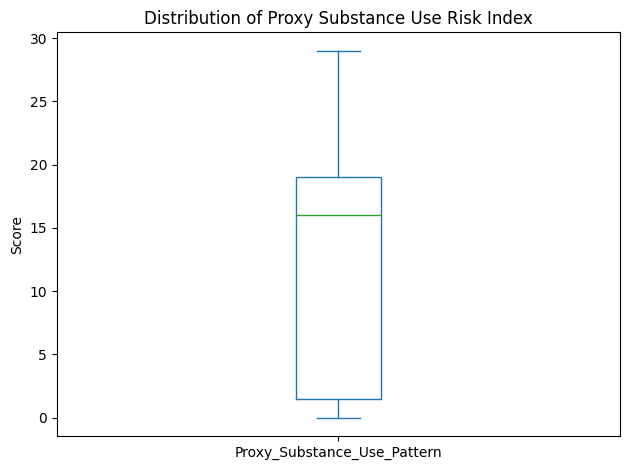

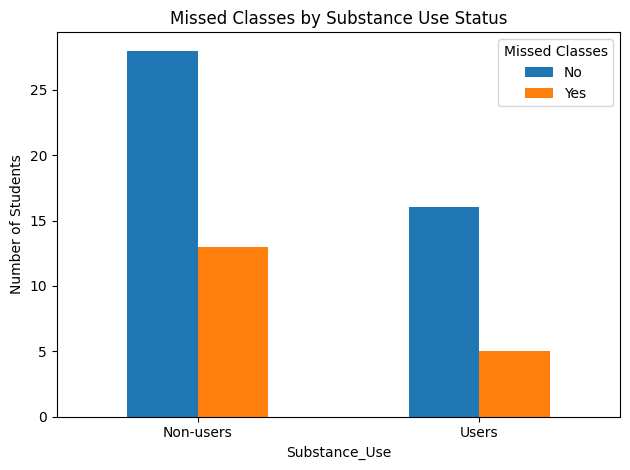

<Figure size 640x480 with 0 Axes>

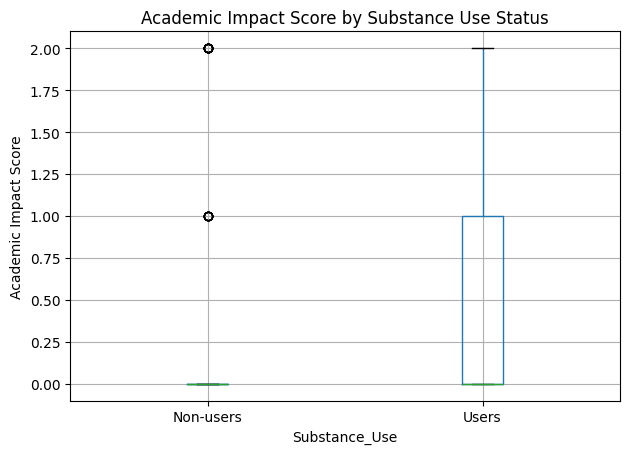

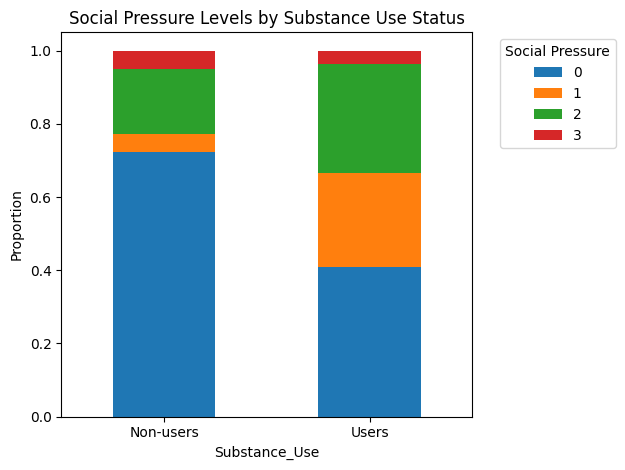

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================================
# Load dataset
# =========================================
file_path = "drive/MyDrive/Datasets/Surveys/Substance_Abuse_Academic_Development_Final.csv"
df = pd.read_csv(file_path)

# =========================================
# Perform necessary data preparation steps for plotting
# (Based on Objective 3 and 4 analyses)
# =========================================

# 1. Rename columns to safe names (from Objective 3)
df = df.rename(columns={
    "Have you ever missed classes due to substance use or its aftereffects?": "missed_classes",
    "Do you experience difficulty concentrating or retaining information after substance\nuse?": "concentration_problem",
    "Has your substance use affected your academic performance?": "academic_performance_affected"
})

# 2. Clean academic outcome variables (from Objective 3)
invalid_entries = ["None", "Nill", "Nil", "Non", "Not Applicable", "", "Nan"]

for col in ["missed_classes", "concentration_problem", "academic_performance_affected"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.title()
        .replace(invalid_entries, np.nan)
        .map({"Yes": 1, "No": 0})
    )

# 3. Create academic impact score (from Objective 3)
df["Academic_Impact_Score"] = (
    df[["missed_classes", "concentration_problem", "academic_performance_affected"]]
    .sum(axis=1, skipna=True)
)

# 4. Clean and encode mental health variable 'social_pressure' (from Objective 4)
pressure_col_original = "How often do you feel socially pressured to use substances?"
pressure_map = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3
}
df["social_pressure"] = (
    df[pressure_col_original]
    .astype(str)
    .str.strip()
    .str.title()
    .map(pressure_map)
)

# =========================================
# Filter substance users only (common for several plots)
# =========================================
users = df[df["Substance_Use"] == 1].copy()

# =========================================
# OBJECTIVE 1: Substance Types (Proportions)
# =========================================
substance_col = "Which substances have you used? (Tick all that apply)"

substances = (
    users[substance_col]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
    .str.title()
)

# Remove invalid entries like 'None', empty strings, 'Nan'
invalid_substances = ["None", "", "Nan"]
substances = substances[~substances.isin(invalid_substances)]


substance_props = substances.value_counts(normalize=True)

plt.figure()
substance_props.plot(kind="bar")
plt.ylabel("Proportion")
plt.title("Distribution of Substance Types Used")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# =========================================
# OBJECTIVE 1: Substance Source by Type
# =========================================
source_col = "Where do you typically access substances?"

long_df = users[[substance_col, source_col]].dropna()

long_df = long_df.assign(
    Substance=long_df[substance_col].str.split(";"),
    Source=long_df[source_col].str.split(";")
).explode("Substance").explode("Source")

long_df["Substance"] = long_df["Substance"].str.strip().str.title()
long_df["Source"] = long_df["Source"].str.strip().str.title()

# Remove invalid entries
invalid_sources = [
    "None", "Nill", "Non", "Not Applicable", "", "Nan"
]
long_df = long_df[
    (~long_df["Substance"].isin(invalid_substances)) &
    (~long_df["Source"].isin(invalid_sources))
]

cross = pd.crosstab(long_df["Substance"], long_df["Source"], normalize="index")

cross.plot(kind="bar", stacked=True)
plt.ylabel("Proportion")
plt.title("Sources of Substances by Substance Type")
plt.legend(title="Source", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# =========================================
# OBJECTIVE 2: Frequency of Use (Descriptive)
# =========================================
freq_col = "How frequently do you use any of the substances listed above?"

freq_counts = (
    users[freq_col]
    .value_counts()
)

plt.figure()
freq_counts.plot(kind="bar")
plt.ylabel("Number of Students")
plt.title("Frequency of Substance Use")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# =========================================
# OBJECTIVE 2: Proxy Risk Index Distribution
# Re-create the Proxy_Substance_Use_Pattern for 'users' DataFrame
# =========================================

# ---- Social Pressure Score (using 'social_pressure' already created on df) ----
users["Social_Pressure_Score"] = users["social_pressure"]

# ---- Age of First Use Score ----
age_first_col = "At what age did you first experiment with any substance?"
users["Age_First_Use"] = pd.to_numeric(
    users[age_first_col], errors="coerce"
)
# Earlier age = higher risk → reverse scale
# Use .fillna(0) to handle cases where 'Age_First_Use' might be NaN for some users
users["Age_First_Use_Score"] = (
    users["Age_First_Use"].max() - users["Age_First_Use"]
).fillna(0)


# ---- Missed Classes Score (using 'missed_classes' already created on df) ----
users["Missed_Classes_Score"] = users["missed_classes"]

# ---- PROXY SUBSTANCE USE PATTERN INDEX (EXPLORATORY) ----
users["Proxy_Substance_Use_Pattern"] = (
    users[
        ["Social_Pressure_Score",
         "Age_First_Use_Score",
         "Missed_Classes_Score"]
    ]
    .sum(axis=1, skipna=True)
)

plt.figure()
users["Proxy_Substance_Use_Pattern"].plot(kind="box")
plt.ylabel("Score")
plt.title("Distribution of Proxy Substance Use Risk Index")
plt.tight_layout()
plt.show()

# =========================================
# OBJECTIVE 3: Missed Classes by Substance Use
# =========================================
attendance = pd.crosstab(
    df["Substance_Use"],
    df["missed_classes"] # This column is now correctly renamed and cleaned in df
)

attendance.plot(kind="bar")
plt.ylabel("Number of Students")
plt.title("Missed Classes by Substance Use Status")
plt.xticks([0, 1], ["Non-users", "Users"], rotation=0)
plt.legend(["No", "Yes"], title="Missed Classes")
plt.tight_layout()
plt.show()

# =========================================
# OBJECTIVE 3: Academic Impact Score
# =========================================
plt.figure()
df.boxplot(column="Academic_Impact_Score", by="Substance_Use") # This column is now correctly created in df
plt.ylabel("Academic Impact Score")
plt.title("Academic Impact Score by Substance Use Status")
plt.suptitle("")
plt.xticks([1, 2], ["Non-users", "Users"])
plt.tight_layout()
plt.show()

# =========================================
# OBJECTIVE 4: Social Pressure by Substance Use
# =========================================
pressure = pd.crosstab(
    df["Substance_Use"],
    df["social_pressure"], # This column is now correctly created in df
    normalize="index"
)

pressure.plot(kind="bar", stacked=True)
plt.ylabel("Proportion")
plt.title("Social Pressure Levels by Substance Use Status")
plt.xticks([0, 1], ["Non-users", "Users"], rotation=0)
plt.legend(title="Social Pressure", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### **Conclusion**
This study concludes that substance use among students is generally infrequent and socially driven, with alcohol being the most commonly used substance. Substance use does not appear to exert a strong independent effect on academic performance or mental health outcomes within the study population. Instead, social pressure, environmental availability, and academic stage play more prominent roles in shaping both substance-use behaviour and academic challenges.

Awareness sessions and counselling-based interventions show promise as preventive strategies, particularly when designed to address peer influence and social norms. Expanding access to supportive, student-centred programmes may help mitigate substance use among at-risk subgroups without imposing unnecessary restrictions on the broader student population.